In [80]:
#Importing libraries
import re
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create variables that contains the user credentials to access the twitter API
Consumer_Key = "z1kLR6SE40e4cN4hwz0RM061C"
Consumer_Secret = "gCPu5q8z18GawK9NbrhWGrIzFJP9lG6h6CQ6cPZIVhbdHS6CRP"
Access_Key = "1339139367185514498-hIiJPHQiLvTyoOROI4EkbSji2NjtCP"
Access_Secret = "yTY1usvtYnlk2qfOaS9v0nl9mjdQ4UdcoCa9WjP6ZMUx0"

In [3]:
def fetch_data(search_term):
    #Authorization to consumer key and consumer secret
    auth = tweepy.AppAuthHandler(Consumer_Key, Consumer_Secret)
    
    #Calling an API
    api = tweepy.API(auth, wait_on_rate_limit=True)
    
    #3000 tweets to be extracted
    no_of_tweets = 3000
    temp = []
    tweets = tweepy.Cursor(api.search, q=search_term, lang='en').items(no_of_tweets)
    for tweet in tweets:
        temp.append(tweet.text)
    return temp

In [4]:
l1 = fetch_data('Amazon')
l2 = fetch_data('Flipkart')
l3 = fetch_data('Snapdeal')

In [98]:
amazon_tweets = pd.DataFrame(l1, columns=['tweet'])
flipkart_tweets = pd.DataFrame(l2, columns=['tweet'])
snapdeal_tweets = pd.DataFrame(l3, columns=['tweet'])

In [99]:
amazon_tweets.to_csv('amazon_tweets', index=False)
flipkart_tweets.to_csv('flipkart_tweets', index=False)
snapdeal_tweets.to_csv('snapdeal_tweets', index=False)

In [100]:
amazon_tweets.head(10)

,tweet
0,RT @W_Angels_Wings: #Author Ellie Collins\n\nC...
1,@Channel4 The other week I bought a device fro...
2,RT @CaroleParkes1: HARMONY KENT:\n‘It’s never ...
3,"Blasting Skip Marley, Davido, Oxlade, H.E.R - ..."
4,"RT @cathiedunn: Love Lost in Time is ""a really..."
5,RT @TmarTn: 🎄🎁 GIVEAWAY 21 of 25 🎁🎄\n\n$100 Am...
6,.\n\n🕐┆21:00\n💳┆1000×1 (Amazon)\n\n.\n\n#スクワッド...
7,Amazon Brand - Symbol Men's Solid T-Shirt http...
8,RT @EloualiSabrine: @InkWellSpills I’ve writte...
9,RT @DandyBeyond: It costs $0 to retweet my #rp...


In [101]:
flipkart_tweets.head(10)

,tweet
0,@flipkartsupport I opted for a call back in 'n...
1,OD120255891344016000\nHere is my order I'd and...
2,@Flipkart Really surprised at the level of dis...
3,#prod0 Tecno Spark 6 Go With Dual Rear Cameras...
4,@Flipkart I want to buy @XiaomiIndia Mi 4A pro...
5,https://t.co/pABWPfcepf\n\nTANISHKA EXPORT Ana...
6,@desi_pacito To make sure that your Flipkart a...
7,@AJIOLife Don’t reply with the copy paste msg....
8,Flipkart bets on Tier 3 Plus markets as it reg...
9,https://t.co/jbAaf1RcAb\n\n.TANISHKA EXPORT An...


In [102]:
snapdeal_tweets.head(10)

,tweet
0,@PMOIndia Twitter r User Celebrity VIP I apolo...
1,@myntra My both numbers are working fine and I...
2,@DrRPNishank @EduMinOfIndia @narendramodi @AMU...
3,@sawandkar_angad We always request our custome...
4,@sawandkar_angad Hi! Apologies for the experie...
5,@PMOIndia Twitter r User Celebrity VIP I apolo...
6,@narendramodi Twitter r User Celebrity VIP I a...
7,@MamataOfficial Twitter r User Celebrity VIP I...
8,@BanglarGorboMB Twitter r User Celebrity VIP I...
9,@AmitShah Twitter r User Celebrity VIP I apolo...


## Data Cleaning and Removing Stopwords

In [103]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
#Clean data
def clean_data(input_text):
    input_text = input_text.lower()
    tokens = input_text.split()
    clean_tokens = [re.sub("[^a-z]", "", token) for token in tokens]
    clean_tokens = [word for word in clean_tokens if 'rt' not in word]
    clean_tokens = [word for word in clean_tokens if len(word) >=3]
    clean_tokens = [word for word in clean_tokens if word not in stopwords_list]
    return ' '.join(clean_tokens)

In [104]:
#Remove stopwords

def remove_stopwords(input_text):
    stopwords_list = stopwords.words('english')
    tokens = input_text.split()
    without_stopwords = [word for word in tokens if word not in stopwords_list]
    return ' '.join(without_stopwords)

In [105]:
amazon_tweets['tweet'] = amazon_tweets['tweet'].apply(clean_data)
flipkart_tweets['tweet'] = flipkart_tweets['tweet'].apply(clean_data)
snapdeal_tweets['tweet'] = snapdeal_tweets['tweet'].apply(clean_data)

In [106]:
amazon_tweets.head(10)

,tweet
0,wangelswings author ellie collins check instag...
1,channel week bought device amazon plugged main...
2,caroleparkes harmony kent never late meant jew...
3,blasting skip marley davido oxlade slow rmx ri...
4,cathiedunn love lost time really rather wonder...
5,giveaway amazon gift card enter retweet follow...
6,amazon httpstcojtgtrlqtp
7,amazon brand symbol mens solid httpstcoujzxscfz
8,eloualisabrine inkwellspills ive written poetr...
9,dandybeyond costs retweet rpg journals help gr...


In [107]:
flipkart_tweets.head(10)

,tweet
0,opted call back next minutes one called back t...
1,order num issue resolved chhor httpstcoxiegeli
2,really surprised level disregard customer prob...
3,prod tecno spark dual rear cameras mah battery...
4,want buy xiaomiindia pro delivered address ple...
5,httpstcopabwpfcepf tanishka analog multicolor ...
6,desipacito make sure account information safe ...
7,ajiolife dont reply copy paste msg need soluti...
8,bets tier plus markets registers percent new u...
9,httpstcojbaafrcab tanishka analog multicolor c...


In [108]:
snapdeal_tweets.head(10)

,tweet
0,pmoindia twitter user celebrity vip apologize ...
1,myntra numbers working fine received mail numb...
2,drrpnishank eduminofindia narendramodi amuoffi...
3,sawandkarangad always request customers never ...
4,sawandkarangad apologies experience happened w...
5,pmoindia twitter user celebrity vip apologize ...
6,narendramodi twitter user celebrity vip apolog...
7,mamataofficial twitter user celebrity vip apol...
8,banglargorbomb twitter user celebrity vip apol...
9,amitshah twitter user celebrity vip apologize ...


### Sentiment Analysis

In [109]:
from textblob import TextBlob
def get_sentiment(input):
    blob = TextBlob(input)
    sentiment = blob.sentiment.polarity
    return sentiment

In [110]:
amazon_tweets['sentiment'] = amazon_tweets['tweet'].apply(get_sentiment)
flipkart_tweets['sentiment'] = flipkart_tweets['tweet'].apply(get_sentiment)
snapdeal_tweets['sentiment'] = snapdeal_tweets['tweet'].apply(get_sentiment)

In [111]:
amazon_tweets.head(10)

,tweet,sentiment
0,wangelswings author ellie collins check instag...,0.000000
1,channel week bought device amazon plugged main...,0.000000
2,caroleparkes harmony kent never late meant jew...,0.150000
3,blasting skip marley davido oxlade slow rmx ri...,0.078571
4,cathiedunn love lost time really rather wonder...,0.566667
5,giveaway amazon gift card enter retweet follow...,0.700000
6,amazon httpstcojtgtrlqtp,0.000000
7,amazon brand symbol mens solid httpstcoujzxscfz,0.000000
8,eloualisabrine inkwellspills ive written poetr...,0.100000
9,dandybeyond costs retweet rpg journals help gr...,0.000000


In [112]:
flipkart_tweets.head(10)

,tweet,sentiment
0,opted call back next minutes one called back t...,0.000000
1,order num issue resolved chhor httpstcoxiegeli,0.000000
2,really surprised level disregard customer prob...,0.050000
3,prod tecno spark dual rear cameras mah battery...,0.000000
4,want buy xiaomiindia pro delivered address ple...,0.000000
5,httpstcopabwpfcepf tanishka analog multicolor ...,0.700000
6,desipacito make sure account information safe ...,0.333333
7,ajiolife dont reply copy paste msg need soluti...,-0.200000
8,bets tier plus markets registers percent new u...,0.136364
9,httpstcojbaafrcab tanishka analog multicolor c...,0.700000


In [113]:
snapdeal_tweets.head(10)

,tweet,sentiment
0,pmoindia twitter user celebrity vip apologize ...,0.000000
1,myntra numbers working fine received mail numb...,0.416667
2,drrpnishank eduminofindia narendramodi amuoffi...,0.000000
3,sawandkarangad always request customers never ...,0.000000
4,sawandkarangad apologies experience happened w...,0.000000
5,pmoindia twitter user celebrity vip apologize ...,0.000000
6,narendramodi twitter user celebrity vip apolog...,0.000000
7,mamataofficial twitter user celebrity vip apol...,0.000000
8,banglargorbomb twitter user celebrity vip apol...,0.000000
9,amitshah twitter user celebrity vip apologize ...,0.000000


In [114]:
#Separating positive, negative and neutral tweets
amazon_negative_tweets = amazon_tweets[amazon_tweets['sentiment'] < 0].count()[0]
amazon_positive_tweets = amazon_tweets[amazon_tweets['sentiment'] > 0].count()[0]

flipkart_negative_tweets = flipkart_tweets[flipkart_tweets['sentiment'] < 0].count()[0]
flipkart_positive_tweets = flipkart_tweets[flipkart_tweets['sentiment'] > 0].count()[0]

snapdeal_negative_tweets = snapdeal_tweets[snapdeal_tweets['sentiment'] < 0].count()[0]
snapdeal_positive_tweets = snapdeal_tweets[snapdeal_tweets['sentiment'] > 0].count()[0]

In [115]:
y_pos = [0, 1]
amazon_counts = [amazon_negative_tweets, amazon_positive_tweets]
flipkart_counts = [flipkart_negative_tweets, flipkart_positive_tweets]
snapdeal_counts = [snapdeal_negative_tweets, snapdeal_positive_tweets]

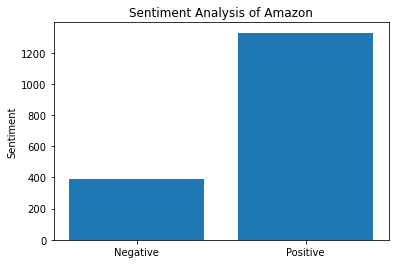

In [116]:
#Plotting a bar graph for viewing sentiment of tweets of Amazon
plt.bar(y_pos, amazon_counts, align='center', alpha=1)
plt.xticks(y_pos, ['Negative', 'Positive'])
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis of Amazon')
plt.show()

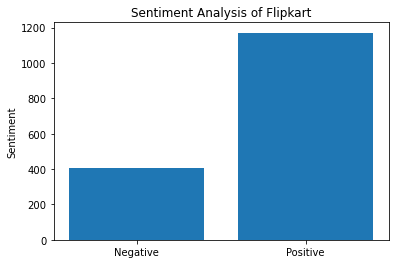

In [117]:
#Plotting a bar graph for viewing sentiment of tweets of flipkart
plt.bar(y_pos, flipkart_counts, align='center', alpha=1)
plt.xticks(y_pos, ['Negative', 'Positive'])
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis of Flipkart')
plt.show()

Text(0.5, 1.0, 'Sentiment Analysis of Snapdeal')

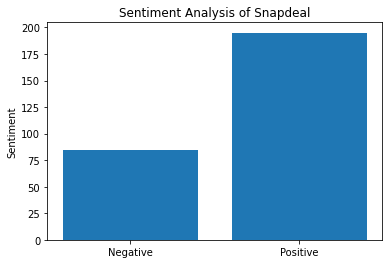

In [118]:
#Plotting a bar graph for viewing sentiment of tweets of snapdeal
plt.bar(y_pos, snapdeal_counts, align='center', alpha=1)
plt.xticks(y_pos, ['Negative', 'Positive'])
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis of Snapdeal')

### Create a wordcloud

In [119]:
from wordcloud import WordCloud

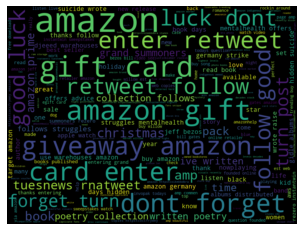

In [120]:
allwords = ' '.join(word for word in amazon_tweets['tweet'])
wordcloud = WordCloud(width=1000, height=750, random_state=42, max_font_size=120).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

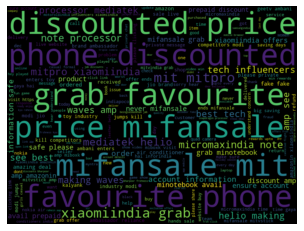

In [121]:
allwords = ' '.join(word for word in flipkart_tweets['tweet'])
wordcloud = WordCloud(width=1000, height=750, random_state=42, max_font_size=120).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

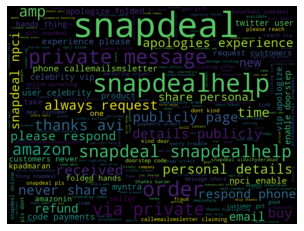

In [122]:
allwords = ' '.join(word for word in snapdeal_tweets['tweet'])
wordcloud = WordCloud(width=1000, height=750, random_state=42, max_font_size=120).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()